# Dyadic Predictors

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect
sys.path.append("../src")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from shared import directories
from shared import filenames
from shared import variables
from analysis import trivariate
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)

import bivariate, independence, visual
import warnings
warnings.filterwarnings('ignore')

##  4.0 Get Data

In [2]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.INTERIM_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_columns = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.COLUMNS_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_labels = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.LABELS_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_columns = df_columns[(df_columns['sel']=='Y') & (df_columns['Predictor_Decision']=='Y')]
df_males = df[df['gender']=='Male']
df_females = df[df['gender']=='Female']
df_yes = df[df['dec']=='Yes']
df_yes_males = df[(df['dec']=='Yes')& (df['gender']=='Male')]
df_yes_females = df[(df['dec']=='Yes')& (df['gender']=='Female')]

## 4.2 Dyadic Predictors

In [5]:
df_columns['status'] = np.where(df_columns['cat no.']==2, "done", "")
df_columns[df_columns['cat no.'] == 2][['status','category','column', 'description']]

,status,category,column,description
13,done,Dyad,int_corr,Interests Correlation
14,done,Dyad,samerace,Same Race
33,done,Dyad,met_o,Has Partner met Subject Before
112,done,Dyad,met,Has Subject Met Partner Before


### 4.2.1 Interest Correlate
Doesn't appear to be a factor for decisions with or without controlling for gender. Both Kruskal and Anova do not reject the null hypothesis that mean correlation in interests is the same, regardless of decision. 

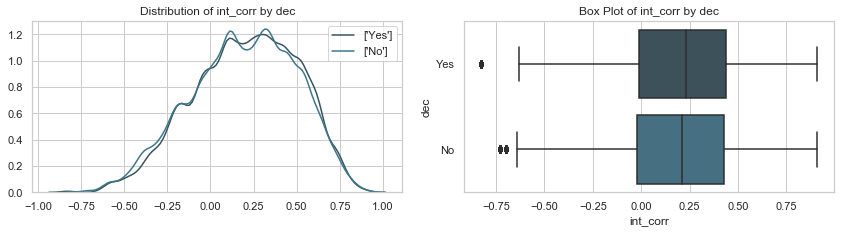

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
int_corr,Reject H0,No,81401.0,1174,-0.73,-0.02,0.190534,0.21,0.43,0.91,0.118386,-8.206758,65.350879,0.0
int_corr,Reject H0,Yes,57739.0,900,-0.83,-0.01,0.206804,0.23,0.44,0.91,0.122933,-7.884798,60.170032,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,int_corr,dec,H-Statistic,-4.240031e+06,1.000000e+00,Fail to Reject
0,Anova,int_corr,dec,F Statistic,9.757833e+01,5.267852e-23,Reject


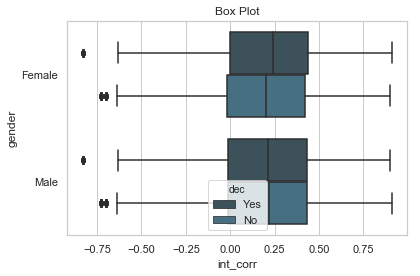

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
int_corr,Female,No,44722.0,697,-0.73,-0.02,0.186503,0.20,0.42,0.90,0.122925,-7.885375,60.179143,0.0,Reject H0
int_corr,Female,Yes,25087.0,392,-0.83,0.00,0.213710,0.24,0.44,0.91,0.123079,-7.874838,60.013075,0.0,Reject H0
int_corr,Male,No,36679.0,477,-0.73,-0.01,0.195449,0.22,0.43,0.91,0.112574,-8.654951,72.908183,0.0,Reject H0
int_corr,Male,Yes,32652.0,508,-0.83,-0.01,0.201498,0.21,0.43,0.90,0.122821,-7.892474,60.291149,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,0.001438,1.0,0.0156923,0.900311,1.12673e-07,-7.06743e-06
dec,8.801685,1.0,96.0755,1.12469e-22,0.000689837,0.000682652
gender:dec,3.727114,1.0,40.6836,1.79539e-10,0.000292115,0.000284933
Residuals,12746.544542,139136.0,,,,


In [6]:
i, d, p = bivariate.analysis(df,x='int_corr', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='int_corr', z='dec')
p
d
i

### 4.2.2 Same Race
Though there was a slight preference for same race among the female subjects, the association by decision and by decision, controlling for gender was very weak. 

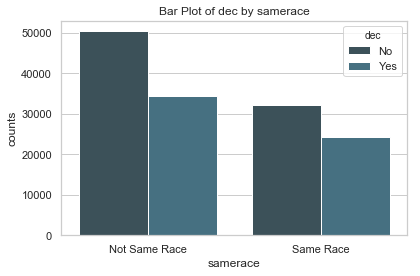

dec,No,Yes
samerace,,
Not Same Race,0.595108,0.404892
Same Race,0.569224,0.430776
All,0.584751,0.415249


,x,y,p-Value,Cramer's V,Strength,Result
0,samerace,dec,4.235687e-22,0.018187,Very Weak Association,Significant


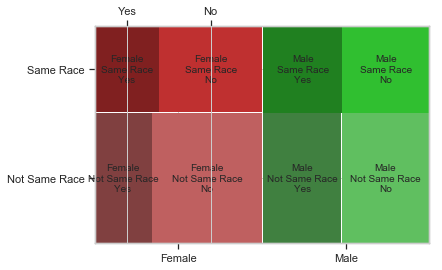

gender          Female                    Male          
samerace Not Same Race Same Race Not Same Race Same Race
dec                                                     
No            0.658891   0.61318      0.530682  0.525023
Yes           0.341109   0.38682      0.469318  0.474977

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,samerace,dec,0.0,0.083713,Very Weak Association,Significant


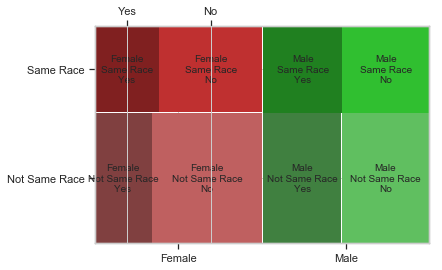

In [7]:
i, d, p = bivariate.analysis(df,x='samerace', y='dec')
p
d['pct']
i
i, d, p = trivariate.analysis(df, x='gender', y='samerace', z='dec')
p
d['pct']
i

### 4.2.3 Met and Met_o
Though prior meetings accounted for a small proportion, it would appear that such meetings were pleasant as a greater number of yes decisions are associated with prior meetings.

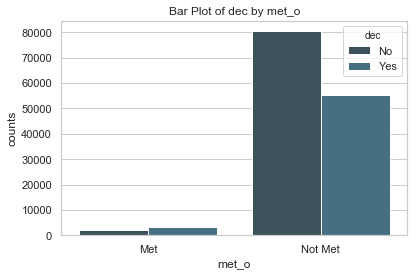

dec,No,Yes
met_o,,
Met,0.389021,0.610979
Not Met,0.592631,0.407369
All,0.584751,0.415249


dec,No,Yes,All,pct
met_o,,,,
Met,2126,3339,5465,3.87
Not Met,80449,55300,135749,96.13
All,82575,58639,141214,100.00


,x,y,p-Value,Cramer's V,Strength,Result
0,met_o,dec,6.892537e-197,0.056328,Very Weak Association,Significant


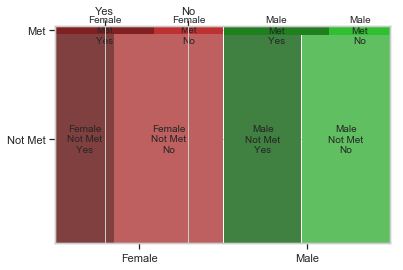

gender    Female                Male          
met_o        Met   Not Met       Met   Not Met
dec                                           
No      0.410306  0.649326  0.369972  0.535191
Yes     0.589694  0.350674  0.630028  0.464809

gender Female          Male             All
met_o     Met Not Met   Met Not Met        
dec                                        
No       1059   44360  1067   36089   82575
Yes      1522   23957  1817   31343   58639
All      2581   68317  2884   67432  141214

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,met_o,dec,0.0,0.098257,Very Weak Association,Significant


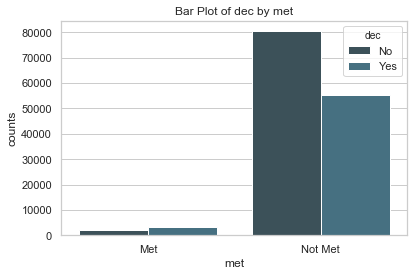

dec,No,Yes
met,,
Met,0.379606,0.620394
Not Met,0.593036,0.406964
All,0.584751,0.415249


dec,No,Yes,All,pct
met,,,,
Met,2081,3401,5482,3.88
Not Met,80494,55238,135732,96.12
All,82575,58639,141214,100.00


,x,y,p-Value,Cramer's V,Strength,Result
0,met,dec,8.816682e-217,0.059135,Very Weak Association,Significant


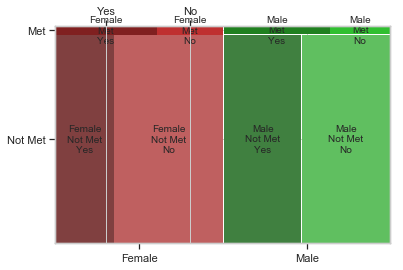

gender    Female                Male          
met          Met   Not Met       Met   Not Met
dec                                           
No      0.393761  0.651096  0.363881  0.534724
Yes     0.606239  0.348904  0.636119  0.465276

gender Female          Male             All
met       Met Not Met   Met Not Met        
dec                                        
No       1136   44283   945   36211   82575
Yes      1749   23730  1652   31508   58639
All      2885   68013  2597   67719  141214

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,met,dec,0.0,0.101087,Very Weak Association,Significant


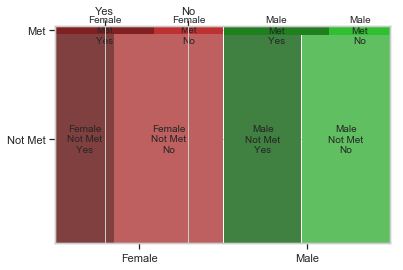

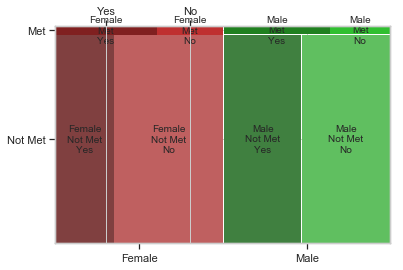

In [8]:
i, d, p = bivariate.analysis(df,x='met_o', y='dec')
p
d['pct']
d['count']
i
i, d, p = trivariate.analysis(df, x='gender', y='met_o', z='dec')
p
d['pct']
d['count']
i
i, d, p = bivariate.analysis(df,x='met', y='dec')
p
d['pct']
d['count']
i
i, d, p = trivariate.analysis(df, x='gender', y='met', z='dec')
p
d['pct']
d['count']
i

## 4.3 Demographic Predictors

In [9]:
df_columns['status'] = np.where(df_columns['cat no.']==3, "done", "")
df_columns[df_columns['cat no.'] == 3][['status','category','column', 'description']]

,status,category,column,description
15,done,Demographic,age_o,Age of Partner
16,done,Demographic,age_diff,Difference in Age [Male-Female]
17,done,Demographic,race_o,Race of Partner
34,done,Demographic,age,Age of Subject
41,done,Demographic,race,Race of Subject


The from, zipcode, and income variables will not be analyzed vis-a-vis decision. The 'from' variables are non-normalized string variables and zipcode and income was not known to the participant at decision time.

### 4.3.1 Age
Age was not a decision factor in decision making.

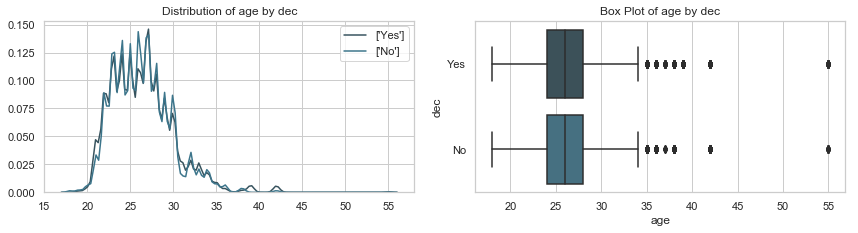

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
age,Reject H0,No,81586.0,989,18.0,24.0,26.332238,26.0,28.0,55.0,0.108782,-8.972488,78.505550,0.0
age,Reject H0,Yes,58279.0,360,18.0,24.0,26.404931,26.0,28.0,55.0,0.078113,-12.644852,157.892288,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,age,dec,H-Statistic,-4.754789e+06,1.000000,Fail to Reject
0,Anova,age,dec,F Statistic,1.505326e+01,0.000105,Reject


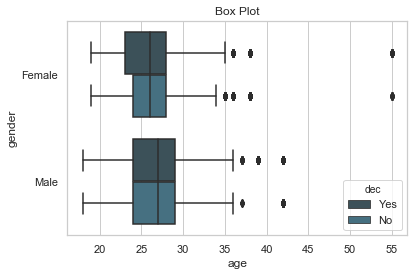

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age,Female,No,44567.0,852,19.0,24.0,26.042408,26.0,28.0,55.0,0.135672,-7.094209,48.327803,0.0,Reject H0
age,Female,Yes,25262.0,217,19.0,23.0,26.158855,26.0,28.0,55.0,0.091893,-10.696884,112.423337,0.0,Reject H0
age,Male,No,37019.0,137,18.0,24.0,26.681164,27.0,29.0,42.0,0.060610,-16.377282,266.215380,0.0,Reject H0
age,Male,Yes,33017.0,143,18.0,24.0,26.593210,27.0,29.0,42.0,0.065527,-15.129192,226.892443,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,1.060069e+04,1.0,894.155,7.61881e-196,0.00635121,0.00634406
dec,3.494157e+00,1.0,0.294728,0.587208,2.09346e-06,-5.00954e-06
gender:dec,3.501386e+02,1.0,29.5337,5.50431e-08,0.000209779,0.000202675
Residuals,1.658129e+06,139861.0,,,,


In [10]:
i, d, p = bivariate.analysis(df,x='age', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='age', z='dec')
p
d
i

### 4.3.2 Age of Partner
The association between age of partner and decision, controlling for gender was statistically significant, but not practically significant. For females, those receiving a yes decision were on average, 2.4 months younger.  Approximately the same for males. 

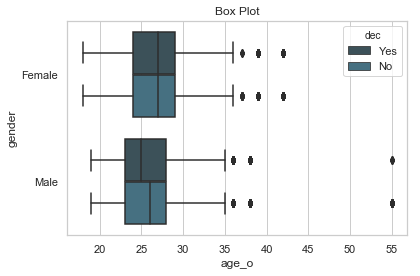

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age_o,Female,No,45299.0,120,18.0,24.0,26.709398,27.0,29.0,42.0,0.051333,-19.377676,373.494316,0.0,Reject H0
age_o,Female,Yes,25309.0,170,18.0,24.0,26.526137,27.0,29.0,42.0,0.081410,-12.119537,144.883188,0.0,Reject H0
age_o,Male,No,36568.0,588,19.0,23.0,26.221013,26.0,28.0,55.0,0.124799,-7.759288,58.206556,0.0,Reject H0
age_o,Male,Yes,32615.0,545,19.0,23.0,25.941806,25.0,28.0,55.0,0.127143,-7.606625,55.860747,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,9.614993e+03,1.0,815.613,7.13828e-179,0.00579423,0.00578709
dec,1.812256e+03,1.0,153.729,2.77099e-35,0.00109211,0.001085
gender:dec,7.697451e+01,1.0,6.52953,0.0106109,4.63867e-05,3.92823e-05
Residuals,1.647904e+06,139787.0,,,,


In [11]:
i, d, p = trivariate.analysis(df, x='gender', y='age_o', z='dec')
p
d
i

### 4.3.3 Age Difference
Age difference was significant predictor of decision when controlling for gender, but for different reasons. For female subjects, the mean age difference for yes decisions was about 1/3rd that of no decisions. On the other hand; the mean age difference for yes decisions was about slightly more than half that for no decisions. It would appear that females were more sensitive to age differences than the males. It's worth adding that the mean for all genders and decisions was positive. This indicates that on average, male subjects were older than the female subjects. 

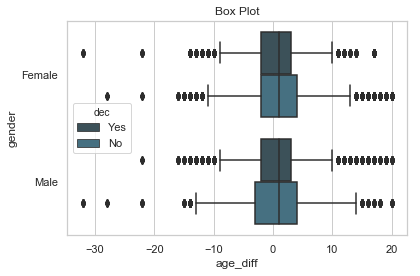

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
age_diff,Female,No,44447.0,972,-28.0,-2.0,0.675344,1.0,4.0,20.0,0.144716,-6.614320,41.749235,0.0,Reject H0
age_diff,Female,Yes,25092.0,387,-32.0,-2.0,0.372429,1.0,3.0,17.0,0.122304,-7.927965,60.852633,0.0,Reject H0
age_diff,Male,No,36431.0,725,-32.0,-3.0,0.488622,1.0,4.0,20.0,0.138317,-6.947630,46.269556,0.0,Reject H0
age_diff,Male,Yes,32482.0,678,-22.0,-2.0,0.649313,1.0,3.0,20.0,0.141521,-6.777125,43.929428,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,9.622158e-01,1.0,0.044408,0.833097,3.20551e-07,-6.89772e-06
dec,1.326400e+02,1.0,6.12158,0.0133553,4.41875e-05,3.69689e-05
gender:dec,1.782357e+03,1.0,82.259,1.20873e-19,0.000593772,0.000586549
Residuals,2.999837e+06,138448.0,,,,


In [12]:
i, d, p = trivariate.analysis(df, x='gender', y='age_diff', z='dec')
p
d
i

### 4.3.4 Race
Overall the association between race, gender and decision was weak. However:
- Asian females decided yes about 40% of the time; whereas Asian males did so about 1/2 the time
- African American females decided yes about 1/2 the time, males about 80% of the time
- Caucasians females were more selective. They had positive decisions about 1/3rd of the time. Men about 45%
- Latino females had a yes rate of about 38%.  Males about 45%.
- Other females matched Latino females.  Other males said yes about 57% of the time

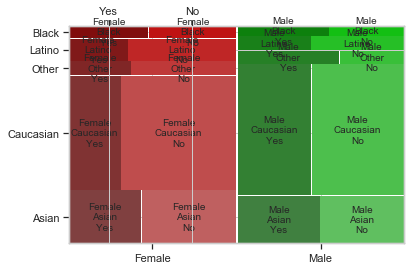

{'count': gender Female                                Male                         \
 race    Asian Black Caucasian Latino Other  Asian Black Caucasian Latino   
 dec                                                                        
 No       9901  2093     25802   4662  2961   7803  1443     23790   2467   
 Yes      7602  1911     11669   2550  1747   7730  1778     19058   1970   
 All     17503  4004     37471   7212  4708  15533  3221     42848   4437   
 
 gender           All  
 race   Other          
 dec                   
 No      1653   82575  
 Yes     2624   58639  
 All     4277  141214  ,
 'pct': gender    Female                                             Male            \
 race       Asian     Black Caucasian    Latino     Other    Asian     Black   
 dec                                                                           
 No      0.565674  0.522727  0.688586  0.646423  0.628929  0.50235  0.447998   
 Yes     0.434326  0.477273  0.311414  0.353577  0.3710

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,race,dec,0.0,0.110493,Very Weak Association,Significant


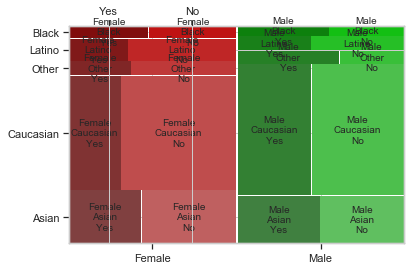

In [13]:
i, d, p = trivariate.analysis(df, x='gender', y='race', z='dec')
p
d
i

### 4.3.5 Race of Partner
Overall decision by race, controlling for gender was significant. 
- Asian females received yes decisions about 25% of the time, males about 40%
- African american females received positive decisions 40% of the time, males about 45%
- Caucasian females had yes rates of about 40%, males 50%
- Latino females had yes rates of approximately 36%. Latino males slightly over 50%
- Other females received yesses about 1/3rd of the time, other males slightly less than half.

As we look at matches, here are the highlights:
- African American females were chosen by African America females 89% of the time.
- African American males were chosen by African American females 67% of the time.
- African American males chose Latinas 62% of the time
- Male Latinos were chosen by 'Other' 74% of the time
- Male Latinos were chosen by African American females 63% of the time
Here are some of the 'lo-lights'
- Caucasian males chose Asian females 18% of the time
- Other and Latinos chose Asian females 25% of the time
- Caucasian males chose African American females 27% of the time


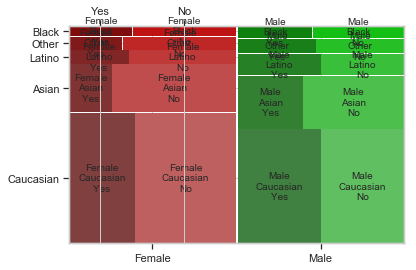

gender    Female                                             Male            \
race_o     Asian     Black Caucasian    Latino    Other     Asian     Black   
dec                                                                           
No      0.740336  0.619234  0.602328  0.641228  0.67838  0.607406  0.548035   
Yes     0.259664  0.380766  0.397672  0.358772  0.32162  0.392594  0.451965   

gender                                
race_o Caucasian    Latino     Other  
dec                                   
No      0.495832  0.497093  0.527544  
Yes     0.504168  0.502907  0.472456

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,race_o,dec,0.0,0.109804,Very Weak Association,Significant


,"(Female, Asian)","(Female, Black)","(Female, Caucasian)","(Female, Latino)","(Female, Other)","(Male, Asian)","(Male, Black)","(Male, Caucasian)","(Male, Latino)","(Male, Other)"
Asian,0.436952,0.432941,0.442069,0.396810,0.389687,0.444360,0.445961,0.542461,0.453824,0.479301
Caucasian,0.167930,0.280294,0.372480,0.261171,0.251691,0.357634,0.423237,0.477670,0.490186,0.445494
Other,0.253081,0.497175,0.398540,0.472296,0.338936,0.590598,0.694444,0.608822,0.734341,0.512329
Latino,0.227399,0.448179,0.384709,0.500000,0.348936,0.292757,0.408451,0.480051,0.494481,0.586667
Black,0.353933,0.910180,0.469388,0.639286,0.529954,0.422705,0.673077,0.595918,0.602899,0.525424


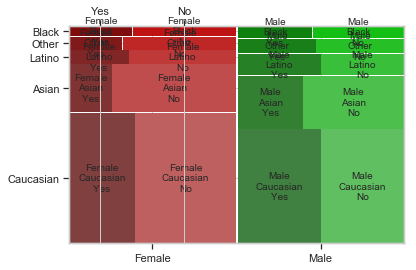

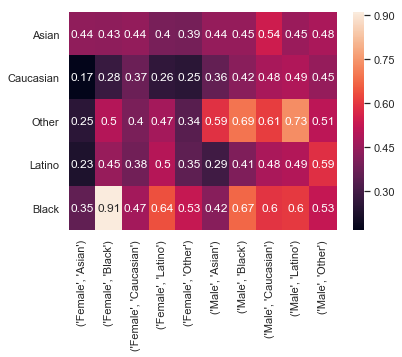

In [14]:
i, d, p = trivariate.analysis(df, x='gender', y='race_o', z='dec')
p
d['pct']
i
rm, p = trivariate.race_match(df)
rm

## 4.4 Partner Speculation
### 4.4.1 Probability Subject Makes Yes Decision
Here we examine the degree to which partners were able to accurate predict the probability of the subject's decision. The association between subject's decision and partners prediction was significant. The mean probability was 55.8% for yes decisions and 49.3% for no decisions.  The result was not significant when controlling for gender.

In [15]:
df_columns['status'] = np.where(df_columns['cat no.']==6, "done", "")
df_columns[df_columns['cat no.'] == 6][['status','category','column', 'description']]

,status,category,column,description
32,done,Partner Speculation re: Probability,prob_o,Probability Subject says Yes


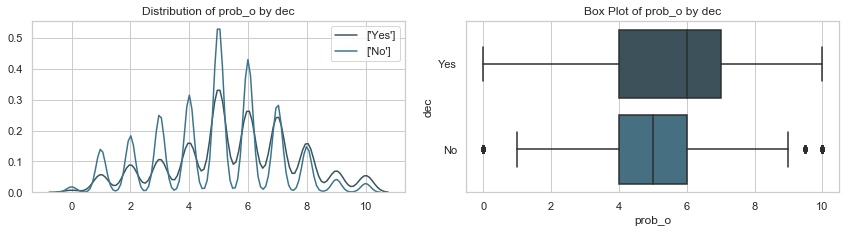

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
prob_o,Reject H0,No,78252.0,4323,0.0,4.0,4.894418,5.0,6.0,10.0,0.222737,-4.019523,14.156563,0.0
prob_o,Reject H0,Yes,57342.0,1297,0.0,4.0,5.566949,6.0,7.0,10.0,0.147069,-6.498760,40.233875,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,prob_o,dec,H-Statistic,5.977230e+06,0.0,Reject
0,Anova,prob_o,dec,F Statistic,3.442177e+03,0.0,Reject


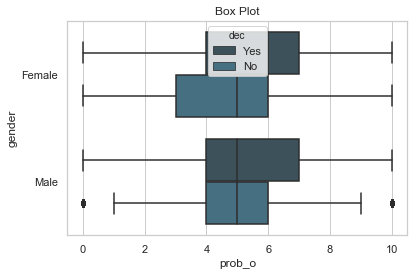

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
prob_o,Female,No,43243.0,2176,0.0,3.0,4.896226,5.0,6.0,10.0,0.213575,-4.233559,15.923022,0.0,Reject H0
prob_o,Female,Yes,25047.0,432,0.0,4.0,5.619915,6.0,7.0,10.0,0.129103,-7.483075,53.996414,0.0,Reject H0
prob_o,Male,No,35009.0,2147,0.0,4.0,4.892185,5.0,6.0,10.0,0.233333,-3.790427,12.367335,0.0,Reject H0
prob_o,Male,Yes,32295.0,865,0.0,4.0,5.525871,5.0,7.0,10.0,0.159390,-5.946599,33.362044,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,58.992758,1.0,13.5695,0.000229976,9.75763e-05,9.03848e-05
dec,14986.039770,1.0,3447.09,0,0.0247875,0.0247801
gender:dec,66.083771,1.0,15.2006,9.67186e-05,0.000109305,0.000102114
Residuals,589469.587358,135590.0,,,,


In [16]:
i, d, p = bivariate.analysis(df, x='prob_o', y='dec')
p
d
i
i, d, p = trivariate.analysis(df, x='gender', y='prob_o', z='dec')
p
d
i

## 4.5 Study
Here we examine the degree to which ones field of study influences their decision.

In [17]:
df_columns['status'] = np.where(df_columns['cat no.']==8, "done", "")
df_columns[df_columns['cat no.'] == 8][['status','category','column', 'description']]

,status,category,column,description
36,done,Study,field_cd,Field Code of Subject
37,done,Study,field_label,Field Label for Subject


### 4.5.1 Decision by Field of Study

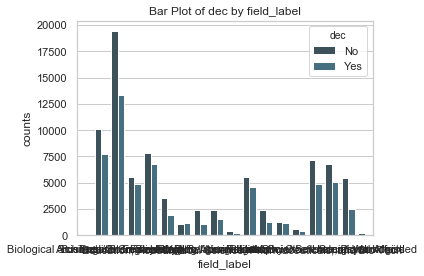

{'pct': dec                                                   No       Yes
 field_label                                                       
 Architecture                                    0.800000  0.200000
 Biological Sciences/Chemistry/Physics           0.566301  0.433699
 Business/Econ/Finance                           0.593577  0.406423
 Education, Academia                             0.532165  0.467835
 Engineering                                     0.536800  0.463200
 English/Creative Writing/ Journalism            0.653426  0.346574
 Film                                            0.468095  0.531905
 Fine Arts/Arts Administration                   0.700581  0.299419
 History/Religion/Philosophy                     0.613127  0.386873
 Languages                                       0.662379  0.337621
 Law                                             0.546529  0.453471
 Math                                            0.657643  0.342357
 Medical Science, Pharmaceuticals, and Bi

,x,y,p-Value,Cramer's V,Strength,Result
0,field_label,dec,5.421264e-273,0.068869,Very Weak Association,Significant


In [18]:
i, d, p = bivariate.analysis(df, x='field_label', y='dec')
p
d
i

## 4.6 Subject Preferences
Here we examine the degree to which ones preferences influence decision.

In [19]:
df_columns['status'] = np.where(df_columns['cat no.']==10, "done", "")
df_columns[df_columns['cat no.'] == 10][['status','category','column', 'description']]

,status,category,column,description
75,done,Subject Preferences 1,attr1_1,How Important is Attraction to Subject at Signup
76,done,Subject Preferences 1,sinc1_1,How Important is Sincerity to Subject at Signup
77,done,Subject Preferences 1,intel1_1,How Important is Intelligence to Subject at Signup
78,done,Subject Preferences 1,fun1_1,How Important is Funny to Subject at Signup
79,done,Subject Preferences 1,amb1_1,How Important is Ambition to Subject at Signup
80,done,Subject Preferences 1,shar1_1,How Important is Shared Interests to Subject at Signup


### 4.6.1 Importance Same Race

### 4.6.1.1 Race by Gender
As a starting point, let's review the numbers of available partners by race and gender. Caucasians represented over 55% of the participants, followed by Asians at 24%.  Latinos, African Americans and Other accounted for 8%, 5%, and 7% respectively. 

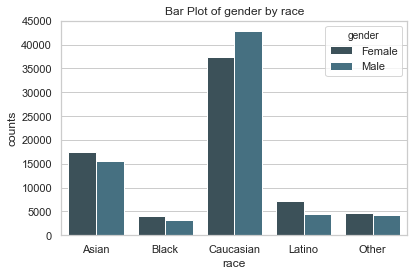

gender,Female,Male,All,pct
race,,,,
Asian,17503,15533,33036,23.39
Black,4004,3221,7225,5.12
Caucasian,37471,42848,80319,56.88
Latino,7212,4437,11649,8.25
Other,4708,4277,8985,6.36
All,70898,70316,141214,100.00


,x,y,p-Value,Cramer's V,Strength,Result
0,race,gender,1.489160e-267,0.066305,Very Weak Association,Significant


In [20]:
i, d, p = bivariate.analysis(df, x='race', y='gender')
p
d['count']
i

### 4.6.1.2 Importance Same Race by Race
The group with the highest weight on same race was the Caucasians, followed by Asians and then Blacks. 

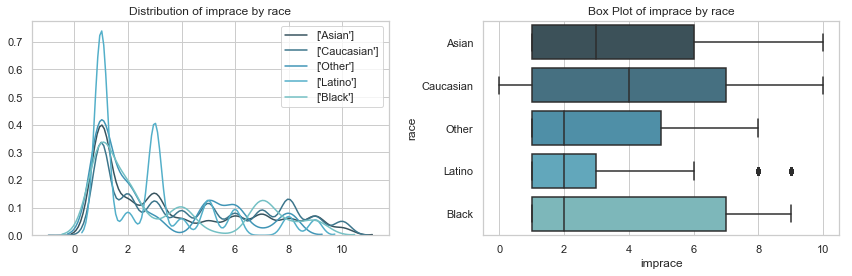

,normality,race,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
imprace,Fail to Reject H0,Asian,33036.0,0,1.0,1.0,3.579943,3.0,6.0,10.0,0.000000,0.000000,-3.000000,1.0
imprace,Fail to Reject H0,Black,7225.0,0,1.0,1.0,3.356125,2.0,7.0,9.0,0.000000,0.000000,-3.000000,1.0
imprace,Reject H0,Caucasian,80015.0,304,0.0,1.0,4.230069,4.0,7.0,10.0,0.061405,-16.162025,259.211036,0.0
imprace,Fail to Reject H0,Latino,11649.0,0,1.0,1.0,2.821358,2.0,3.0,9.0,0.000000,0.000000,-3.000000,1.0
imprace,Reject H0,Other,8220.0,765,1.0,1.0,3.027007,2.0,5.0,8.0,0.279093,-2.972905,6.838164,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,imprace,race,H-Statistic,-5.173450e+06,1.0,Fail to Reject
0,Anova,imprace,race,F Statistic,1.060349e+03,0.0,Reject


In [21]:
i, d, p = bivariate.analysis(df, x='imprace', y='race')
p
d
i

### 4.6.1.3 Importance Same Race, Race and Decision
Higher importance of same race was associated with fewer yes decisions, none moreso that Asians. The mean differences in importance between the decisions were:
Asians 30%
Blacks 27%
Other 27%
Caucasians 7%
Latinos 1%
It would appear that same race was a significant factor for the Asians and the Blacks.

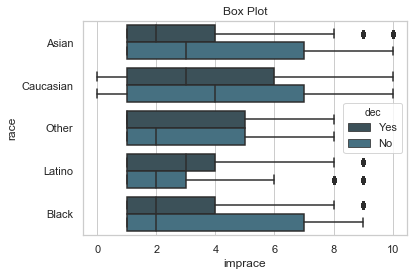

,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
imprace,Asian,No,17704.0,0,1.0,1.0,4.024062,3.0,7.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Asian,Yes,15332.0,0,1.0,1.0,3.067115,2.0,4.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,No,3536.0,0,1.0,1.0,3.875283,2.0,7.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,Yes,3689.0,0,1.0,1.0,2.858498,2.0,4.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Caucasian,No,49345.0,247,0.0,1.0,4.326558,4.0,7.0,10.0,0.070398,-14.063511,195.782334,0.0,Reject H0
imprace,Caucasian,Yes,30670.0,57,0.0,1.0,4.074829,3.0,6.0,10.0,0.043030,-23.153229,534.072034,0.0,Reject H0
imprace,Latino,No,7129.0,0,1.0,1.0,2.863796,2.0,3.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Latino,Yes,4520.0,0,1.0,1.0,2.754425,3.0,4.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Other,No,4107.0,507,1.0,1.0,3.398831,2.0,5.0,8.0,0.312744,-2.494802,4.224039,0.0,Reject H0
imprace,Other,Yes,4113.0,258,1.0,1.0,2.655726,1.0,5.0,8.0,0.235672,-3.742270,12.004588,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,3.165950e+04,4.0,1009.21,0,0.027712,0.0276843
dec,7.860284e+03,1.0,1002.25,3.48455e-219,0.00688021,0.00687329
race:dec,3.896864e+03,4.0,124.22,4.89985e-106,0.00341097,0.00338349
Residuals,1.099032e+06,140135.0,,,,


In [22]:
i, d, p = trivariate.analysis(df, x='imprace',y='race', z='dec')
p
d
i



### 4.6.1.4 Importance Same Race, Gender, Race and Decision

### 4.6.1.4.1 Importance Same Race, Gender, Race and Decision (Males)
For males, the mean differences in importance in decision were:
Asian males 51%
Other 43%
Caucasian males 10%
Black men 6%
Latino (14%)
Same race seems to be more of a factor for Asian males than for Asian females. Similar picture for Other males.  On the other hand, the difference in importance for Blacks dropped from 27% to 6% when considering just the males, suggesting that same race is much more a factor for Black females than for Black males. There was not much of a change among the Caucasians.  For Latinos, the mean importance of same race was actually higher for the yes decisions, when just considering males, suggesting that race was more of a factor for Latinas.

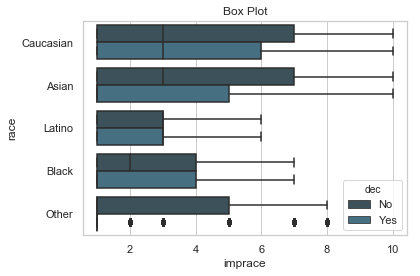

,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
imprace,Asian,No,7803.0,0,1.0,1.0,4.248879,3.0,7.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Asian,Yes,7730.0,0,1.0,1.0,2.745149,1.0,5.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,No,1443.0,0,1.0,1.0,2.802495,2.0,4.0,7.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,Yes,1778.0,0,1.0,1.0,2.478065,1.0,4.0,7.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Caucasian,No,23790.0,0,1.0,1.0,3.964061,3.0,7.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Caucasian,Yes,19058.0,0,1.0,1.0,3.680712,3.0,6.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Latino,No,2467.0,0,1.0,1.0,2.436157,3.0,3.0,6.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Latino,Yes,1970.0,0,1.0,1.0,2.753299,3.0,3.0,6.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Other,No,1536.0,117,1.0,1.0,2.950521,1.0,5.0,8.0,0.256458,-3.347294,9.204377,0.0,Reject H0
imprace,Other,Yes,2561.0,63,1.0,1.0,1.898868,1.0,1.0,8.0,0.153077,-6.218954,36.675393,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,15571.037905,4.0,588.97,0,0.0317809,0.0317265
dec,5498.963760,1.0,831.987,6.97511e-182,0.0112235,0.0112099
race:dec,5387.100407,4.0,203.766,4.34875e-174,0.0109952,0.0109411
Residuals,463493.222259,70126.0,,,,


In [23]:
i, d, p = trivariate.analysis(df_males, x='imprace',y='race', z='dec')
p
d
i



### 4.6.1.4.2 Importance Same Race, Gender, Race and Decision (Females)
For females, the mean differences in importance in decision were:
Asian females 14%
Other 1%
Caucasian females (2)%
Black females 34%
Latinas (10%)
As suspected, race was more significant among males than females in general. The only exception was Black women who's difference in mean level of importance by decision was 34%.

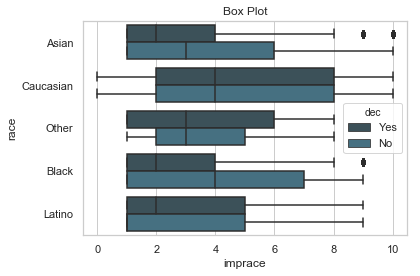

,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
imprace,Asian,No,9901.0,0,1.0,1.0,3.846884,3.0,6.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Asian,Yes,7602.0,0,1.0,1.0,3.394501,2.0,4.0,10.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,No,2093.0,0,1.0,1.0,4.614907,4.0,7.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Black,Yes,1911.0,0,1.0,1.0,3.212454,2.0,4.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Caucasian,No,25555.0,247,0.0,2.0,4.664019,4.0,8.0,10.0,0.097372,-10.073292,99.471204,0.0,Reject H0
imprace,Caucasian,Yes,11612.0,57,0.0,2.0,4.721667,4.0,8.0,10.0,0.069720,-14.202965,199.724207,0.0,Reject H0
imprace,Latino,No,4662.0,0,1.0,1.0,3.090090,1.0,5.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Latino,Yes,2550.0,0,1.0,1.0,2.755294,2.0,5.0,9.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
imprace,Other,No,2571.0,390,1.0,2.0,3.666667,3.0,5.0,8.0,0.338178,-2.178072,2.744000,0.0,Reject H0
imprace,Other,Yes,1552.0,195,1.0,1.0,3.904639,3.0,6.0,8.0,0.314898,-2.466702,4.084619,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,24887.924635,4.0,712.831,0,0.0389489,0.0388938
dec,647.114232,1.0,74.1377,7.43364e-18,0.00101272,0.000999043
race:dec,2463.810821,4.0,70.5676,9.54918e-60,0.0038558,0.00380111
Residuals,610989.504449,69999.0,,,,


In [24]:
i, d, p = trivariate.analysis(df_females, x='imprace',y='race', z='dec')
p
d
i



### 4.6.1.4 Who is Choosing Whom (Female)
Asian females chose Caucasians at a rate of 44% and Blacks at a rate of %42. Asian males were selected at a rate of 41%, followed by Latinos and others at 39% and 38% respectively.  

Black females chose Black males 88% of the time, Latinos 63% of the time and other 6 times out of ten.  Caucasians and Asians were selected at a rate of 48% and 34% respectively.

The selection rate for Caucasians, Other, and Black males among Caucasian females was 38%, 28% adn 25% respectively.  Selection rates for Latinos and Asians was 27% and 18% respectively.

Latinas selected Latinos half the time and Black males 42% of the time.  The selection rates for Other, Caucasians and Asians were 42%, 40%, and 25% respectively.

Other races,chose Latinos, Blacks and Caucasians at rates of 46%, 45%, and 42% respectively.  Other races and Asians were selected at rates of 34% and 26% respectively.

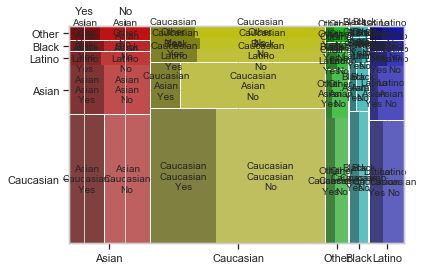

dec                        No       Yes
race      race_o                       
Asian     Asian      0.563048  0.436952
          Black      0.567059  0.432941
          Caucasian  0.557931  0.442069
          Latino     0.603190  0.396810
          Other      0.610313  0.389687
Black     Asian      0.646067  0.353933
          Black      0.089820  0.910180
          Caucasian  0.530612  0.469388
          Latino     0.360714  0.639286
          Other      0.470046  0.529954
Caucasian Asian      0.832070  0.167930
          Black      0.719706  0.280294
          Caucasian  0.627520  0.372480
          Latino     0.738829  0.261171
          Other      0.748309  0.251691
Latino    Asian      0.772601  0.227399
          Black      0.551821  0.448179
          Caucasian  0.615291  0.384709
          Latino     0.500000  0.500000
          Other      0.651064  0.348936
Other     Asian      0.746919  0.253081
          Black      0.502825  0.497175
          Caucasian  0.601460  0.398540
          Latino     0.527704  0.472296
          Other      0.661064  0.338936

dec                     No    Yes    All
race      race_o                        
Asian     Asian       2246   1743   3989
          Black        482    368    850
          Caucasian   5846   4632  10478
          Latino       605    398   1003
          Other        722    461   1183
Black     Asian        575    315    890
          Black         15    152    167
          Caucasian   1300   1150   2450
          Latino       101    179    280
          Other        102    115    217
Caucasian Asian       6585   1329   7914
          Black       1271    495   1766
          Caucasian  14694   8722  23416
          Latino      1703    602   2305
          Other       1549    521   2070
Latino    Asian       1393    410   1803
          Black        197    160    357
          Caucasian   2535   1585   4120
          Latino       231    231    462
          Other        306    164    470
Other     Asian        788    267   1055
          Black         89     88    177
          Caucasian   1648   1092   2740
          Latino       200    179    379
          Other        236    121    357
All                  45419  25479  70898

,x,y,z,p-Value,Cramer's V,Strength,Result
0,race,race_o,dec,0.0,0.139274,Very Weak Association,Significant


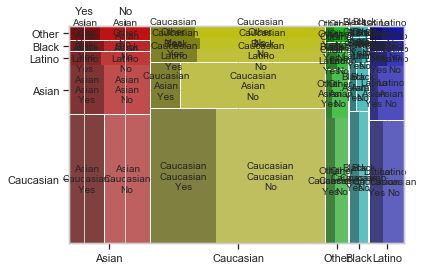

In [25]:
i, d, p = trivariate.analysis(df_females, x='race', y='race_o', z='dec')
p
d['pct'].T
d['count'].T
i

### 4.6.1.5 Who is Choosing Whom (Male)
Asian males chose Caucasian females over half the time. Other races, Latinos Asians, and Blacks were selected 51%, 47%, 46% and 45% of the time respectively.

Black males chose same race females 2/3rds of the time.  Latinas, Caucasians and Other races were selected 63%,59% and 45% of the time respectively. Asian females were chosen 42% of the time.

Caucasian males chose Latinas, Caucasian females, Other races, Blacks and Asians at rates of 51%, 48%, 44%, 42% and 38% respectively.

Latinos chose females from other races 58% of the time.  Caucasians and Latinas were selected 1/2 and 46% of the time. Blacks and Asians were selected 38% and 32% of the time respectively.

Other race males chose Latinas, Blacks and Caucasians at rates of 74%, 60%, 57%. Asians and other races were chosen 54% and 48% of the time. 

dec                        No       Yes
race      race_o                       
Asian     Asian      0.555640  0.444360
          Black      0.554039  0.445961
          Caucasian  0.457539  0.542461
          Latino     0.546176  0.453824
          Other      0.520699  0.479301
Black     Asian      0.577295  0.422705
          Black      0.326923  0.673077
          Caucasian  0.404082  0.595918
          Latino     0.397101  0.602899
          Other      0.474576  0.525424
Caucasian Asian      0.642366  0.357634
          Black      0.576763  0.423237
          Caucasian  0.522330  0.477670
          Latino     0.509814  0.490186
          Other      0.554506  0.445494
Latino    Asian      0.707243  0.292757
          Black      0.591549  0.408451
          Caucasian  0.519949  0.480051
          Latino     0.505519  0.494481
          Other      0.413333  0.586667
Other     Asian      0.409402  0.590598
          Black      0.305556  0.694444
          Caucasian  0.391178  0.608822
          Latino     0.265659  0.734341
          Other      0.487671  0.512329

,x,y,z,p-Value,Cramer's V,Strength,Result
0,race,race_o,dec,1.424638e-295,0.10217,Very Weak Association,Significant


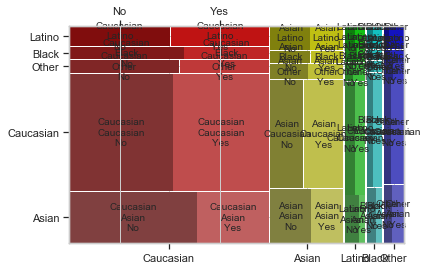

In [26]:
i, d, p = trivariate.analysis(df_males, x='race', y='race_o', z='dec')
d['pct'].T
i

### 4.6.2 Subject Preference: Attractive
Overall males weighed attractiveness significantly more heavily than did female subjects; however, attractiveness had a larger effect on the decisions of females than on the decisions for males. For females, the mean weighting was 11% higher for no decisions. For males, the mean weighting was just 6% higher for no decisions.


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,2.645445e+06,1.0,19651.4,0,0.122447,0.12244
dec,9.233512e+04,1.0,685.901,8.05629e-151,0.00427382,0.00426756
gender:dec,1.432429e+03,1.0,10.6406,0.00110656,6.63014e-05,6.007e-05
Residuals,1.886562e+07,140141.0,,,,


,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
attr1_1,Female,No,44782.0,637,0.00,14.00,18.864574,16.00,20.0,90.0,0.117594,-8.265327,66.315637,0.0,Reject H0
attr1_1,Female,Yes,25227.0,252,0.00,10.00,16.992383,15.00,20.0,90.0,0.098958,-9.905409,96.117132,0.0,Reject H0
attr1_1,Male,No,37039.0,117,6.67,20.00,27.439154,25.00,30.0,100.0,0.056027,-17.736285,312.575808,0.0,Reject H0
attr1_1,Male,Yes,33097.0,63,6.67,18.37,25.980147,20.51,30.0,100.0,0.043546,-22.876868,521.351110,0.0,Reject H0


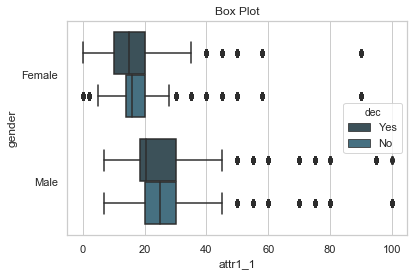

,F,p-value,H0
Female,649.305160,1.419277e-142,Reject
Male,204.385572,2.679332e-46,Reject


,gender,dec,mean,effect
attr1_1,Female,No,18.864574,1.110178
attr1_1,Female,Yes,16.992383,0.900756
attr1_1,Male,No,27.439154,1.056159
attr1_1,Male,Yes,25.980147,0.946828


In [27]:
x = 'gender'
y = 'attr1_1'
z = 'dec'
i, d, p = trivariate.analysis(df, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, x, z)
effect

#### 4.6.2.1 Subject Preferences Attractive by Race and Decision: Females
The influence of attractiveness on decision was different among females of different races. 
The effect of preference for attractiveness on decision:
Asians: 16%
Blacks: 5%
Caucasians: 8%
Latina: 7%
Other: 38% 
Note, the difference in mean weightings by decision for Caucasians was not significant.


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,6.715152e+04,4.0,195.653,3.8886e-167,0.0109055,0.0108496
dec,5.927136e+04,1.0,690.773,1.65794e-151,0.00962578,0.00961171
race:dec,2.492164e+04,4.0,72.6118,1.67459e-61,0.00404732,0.00399153
Residuals,6.006220e+06,69999.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
attr1_1,Asian,No,9901.0,0,2.0,14.00,18.449672,15.09,20.00,90.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Asian,Yes,7602.0,0,2.0,10.00,15.930197,15.00,17.65,90.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Black,No,2093.0,0,10.0,13.04,20.668562,16.07,20.00,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Black,Yes,1911.0,0,10.0,14.58,19.633019,20.00,20.00,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Caucasian,No,25555.0,247,5.0,15.00,18.313777,16.36,20.00,50.0,0.097372,-10.073292,99.471204,0.0,Reject H0
attr1_1,Caucasian,Yes,11612.0,57,5.0,10.00,16.985797,15.38,20.00,50.0,0.069720,-14.202965,199.724207,0.0,Reject H0
attr1_1,Latino,No,4662.0,0,0.0,10.00,19.609331,15.52,30.00,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Latino,Yes,2550.0,0,0.0,10.00,18.352275,15.00,25.00,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Other,No,2571.0,390,5.0,14.00,23.118086,20.00,25.00,50.0,0.338178,-2.178072,2.744000,0.0,Reject H0
attr1_1,Other,Yes,1552.0,195,5.0,15.00,16.758634,20.00,20.00,25.0,0.314898,-2.466702,4.084619,0.0,Reject H0


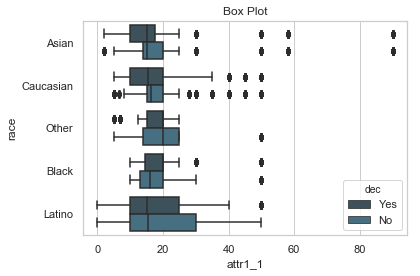

,F,p-value,H0
Asian,116.088123,5.042145e-27,Reject
Black,18.356202,1.855982e-05,Reject
Caucasian,1.530689,2.160126e-01,Fail to Reject
Latino,25.445701,4.618653e-07,Reject
Other,67.460070,2.477391e-16,Reject


,race,dec,mean,effect
attr1_1,Asian,No,18.449672,1.158157
attr1_1,Asian,Yes,15.930197,0.863441
attr1_1,Black,No,20.668562,1.052745
attr1_1,Black,Yes,19.633019,0.949898
attr1_1,Caucasian,No,18.313777,1.078182
attr1_1,Caucasian,Yes,16.985797,0.927487
attr1_1,Latino,No,19.609331,1.068496
attr1_1,Latino,Yes,18.352275,0.935895
attr1_1,Other,No,23.118086,1.379473
attr1_1,Other,Yes,16.758634,0.724914


In [28]:
x = 'race'
y = 'attr1_1'
z = 'dec'
i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, x, z)
effect

#### 4.6.2.2 Subject Preferences Attractive by Race and Decision: Males
The influence of attractiveness on decision was different among females of different races. 
The effect of preference for attractiveness on decision:
Asians: 5%
Blacks: 8%
Caucasians: 5% (not significant)
Latina: 12%
Other: -1% - the mean weighting for attractiveness was higher for positive decisions in this case


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,1.304615e+05,4.0,181.072,1.21625e-154,0.0101955,0.0101391
dec,2.861929e+04,1.0,158.887,2.1695e-36,0.00223659,0.00222248
race:dec,5.514419e+03,4.0,7.65366,3.67935e-06,0.000430951,0.000374639
Residuals,1.263135e+07,70126.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
attr1_1,Asian,No,7803.0,0,11.11,17.39,25.306562,20.00,30.00,80.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Asian,Yes,7730.0,0,11.11,15.56,24.163332,20.00,25.00,80.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Black,No,1443.0,0,16.00,20.00,28.002772,30.00,35.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Black,Yes,1778.0,0,16.00,20.00,25.980315,25.00,30.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Caucasian,No,23790.0,0,6.67,20.00,28.376332,25.00,30.00,100.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Caucasian,Yes,19058.0,0,6.67,19.00,27.115056,23.81,30.00,100.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Latino,No,2467.0,0,10.00,18.60,26.730422,23.00,30.00,75.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Latino,Yes,1970.0,0,10.00,14.71,23.880102,20.00,30.00,75.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
attr1_1,Other,No,1536.0,117,10.00,20.00,24.366432,20.00,27.78,55.0,0.256458,-3.347294,9.204377,0.0,Reject H0
attr1_1,Other,Yes,2561.0,63,10.00,20.00,24.633674,20.00,30.00,55.0,0.153077,-6.218954,36.675393,0.0,Reject H0


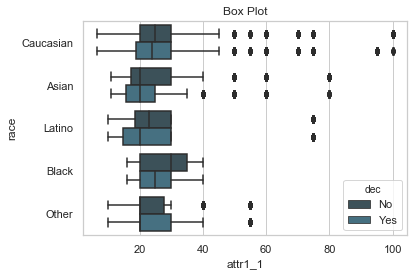

,F,p-value,H0
Asian,116.088123,5.042145e-27,Reject
Black,18.356202,1.855982e-05,Reject
Caucasian,1.530689,2.160126e-01,Fail to Reject
Latino,25.445701,4.618653e-07,Reject
Other,67.460070,2.477391e-16,Reject


,race,dec,mean,effect
attr1_1,Asian,No,25.306562,1.047313
attr1_1,Asian,Yes,24.163332,0.954825
attr1_1,Black,No,28.002772,1.077846
attr1_1,Black,Yes,25.980315,0.927777
attr1_1,Caucasian,No,28.376332,1.046516
attr1_1,Caucasian,Yes,27.115056,0.955552
attr1_1,Latino,No,26.730422,1.119360
attr1_1,Latino,Yes,23.880102,0.893368
attr1_1,Other,No,24.366432,0.989151
attr1_1,Other,Yes,24.633674,1.010968


In [29]:
x = 'race'
y = 'attr1_1'
z = 'dec'
i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, x, z)
effect

### 4.6.3 Subject Preference: Sincerity
Preference for sincerity weighed slightly more heavily on the decision for males, than it did for females. The mean difference in weighting for positive decisions was 5% higher than for no decisions.  For females, the difference was just about 3%.


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,1.171893e+05,1.0,2454.42,0,0.0171735,0.0171664
dec,1.466436e+04,1.0,307.131,1.09053e-68,0.00214899,0.00214198
gender:dec,7.761948e+02,1.0,16.2567,5.53439e-05,0.000113748,0.00010675
Residuals,6.691207e+06,140141.0,,,,


,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
sinc1_1,Female,No,44782.0,637,0.0,15.0,18.175723,19.23,20.0,60.0,0.117594,-8.265327,66.315637,0.0,Reject H0
sinc1_1,Female,Yes,25227.0,252,0.0,15.0,18.678060,20.00,20.0,60.0,0.098958,-9.905409,96.117132,0.0,Reject H0
sinc1_1,Male,No,37039.0,117,0.0,10.0,16.209133,17.02,20.0,40.0,0.056027,-17.736285,312.575808,0.0,Reject H0
sinc1_1,Male,Yes,33097.0,63,0.0,14.0,17.015624,17.78,20.0,40.0,0.043546,-22.876868,521.351110,0.0,Reject H0


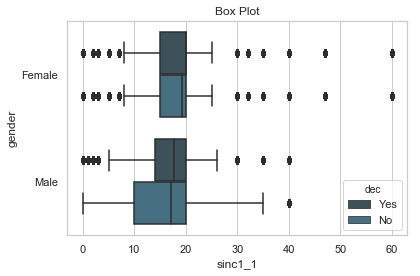

,F,p-value,H0
Female,92.786620,6.010419e-22,Reject
Male,220.321006,9.162903e-50,Reject


,gender,dec,mean,effect
sinc1_1,Female,No,18.175723,0.973105
sinc1_1,Female,Yes,18.678060,1.027638
sinc1_1,Male,No,16.209133,0.952603
sinc1_1,Male,Yes,17.015624,1.049755


In [30]:
x = 'gender'
y = 'sinc1_1'
z = 'dec'
i, d, p = trivariate.analysis(df, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, x, z)
effect

#### 4.6.3.1 Subject Preference by Race: Sincerity: Females
The effect of the preference for sincerity among females had a mixed effect on the decision.
The difference in mean weighting between the decisions for females was:
Asians: 5% difference in the yes decision
Blacks: 9% difference in the no decision
Caucasians: 4% difference in the yes decision
Latino: 6% difference in the no decision
Other: 2% difference in the yes decision
A difference in the yes direction means that the mean weightings were higher for the preference when making a yes decision.


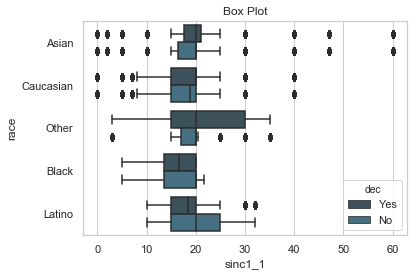

,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
sinc1_1,Asian,No,9901.0,0,0.0,16.33,18.773166,20.00,20.0,60.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Asian,Yes,7602.0,0,0.0,17.65,19.770589,20.00,21.0,60.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Black,No,2093.0,0,5.0,13.46,16.830435,20.00,20.0,21.74,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Black,Yes,1911.0,0,5.0,13.46,15.488697,16.67,20.0,20.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Caucasian,No,25555.0,247,0.0,15.00,17.649251,18.87,20.0,40.00,0.097372,-10.073292,99.471204,0.0,Reject H0
sinc1_1,Caucasian,Yes,11612.0,57,0.0,15.00,18.331287,20.00,20.0,40.00,0.069720,-14.202965,199.724207,0.0,Reject H0
sinc1_1,Latino,No,4662.0,0,10.0,15.00,19.350493,20.00,25.0,32.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Latino,Yes,2550.0,0,10.0,15.00,18.324706,18.37,20.0,32.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Other,No,2571.0,390,3.0,17.00,20.072890,20.00,20.0,35.00,0.338178,-2.178072,2.744000,0.0,Reject H0
sinc1_1,Other,Yes,1552.0,195,3.0,15.00,20.428866,20.00,30.0,35.00,0.314898,-2.466702,4.084619,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,5.655416e+04,4.0,329.103,4.07537e-281,0.0183891,0.018333
dec,3.124222e+03,1.0,72.7226,1.52136e-17,0.00101587,0.00100189
race:dec,8.523352e+03,4.0,49.5996,9.52641e-42,0.00277145,0.00271553
Residuals,3.007213e+06,69999.0,,,,


,race,dec,mean,effect
sinc1_1,Asian,No,18.773166,0.949550
sinc1_1,Asian,Yes,19.770589,1.053130
sinc1_1,Black,No,16.830435,1.086627
sinc1_1,Black,Yes,15.488697,0.920279
sinc1_1,Caucasian,No,17.649251,0.962794
sinc1_1,Caucasian,Yes,18.331287,1.038644
sinc1_1,Latino,No,19.350493,1.055978
sinc1_1,Latino,Yes,18.324706,0.946989
sinc1_1,Other,No,20.072890,0.982575
sinc1_1,Other,Yes,20.428866,1.017734


In [31]:
i, d, p = trivariate.analysis(df_females, x='race', y='sinc1_1', z='dec')
p
d
i
re = trivariate.effect(d, 'race', 'dec')
re

#### 4.6.3.2 Subject Preference by Race: Sincerity: Males
With the exception of Blacks, the preference for sincerity was positively associated with a yes decision. 
Asian: 6% higher weights for yes decision 
Black: 12% higher weights for the no decision
Cuacasian: 3% higher weights for the yes decision
Latino: 7% higher weights for the yes decision
Other: 7% higher weights for the yes decision
A higher mean weight for the yes decision means that a preference for sincerity had a positive association with a yes decision 

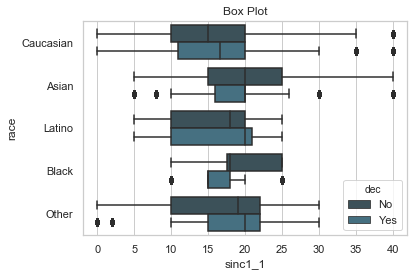

,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
sinc1_1,Asian,No,7803.0,0,5.0,15.00,18.844601,20.00,25.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Asian,Yes,7730.0,0,5.0,16.00,19.934044,20.00,20.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Black,No,1443.0,0,10.0,17.50,19.158004,18.00,25.00,25.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Black,Yes,1778.0,0,10.0,15.00,17.053431,15.00,18.00,25.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Caucasian,No,23790.0,0,0.0,10.00,15.128381,15.00,20.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Caucasian,Yes,19058.0,0,0.0,10.87,15.618009,16.67,20.00,40.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Latino,No,2467.0,0,5.0,10.00,15.757256,18.00,20.00,25.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Latino,Yes,1970.0,0,5.0,10.00,16.919594,20.00,20.93,25.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
sinc1_1,Other,No,1536.0,117,0.0,10.00,17.515182,19.00,22.00,30.0,0.256458,-3.347294,9.204377,0.0,Reject H0
sinc1_1,Other,Yes,2561.0,63,0.0,15.00,18.654947,20.00,22.00,30.0,0.153077,-6.218954,36.675393,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,2.001169e+05,4.0,1028.45,0,0.0552075,0.0551531
dec,5.893847e+03,1.0,121.16,3.7178e-28,0.00162597,0.00161253
race:dec,7.506927e+03,4.0,38.58,2.62239e-32,0.00207098,0.00201728
Residuals,3.411293e+06,70126.0,,,,


,race,dec,mean,effect
sinc1_1,Asian,No,18.844601,0.945348
sinc1_1,Asian,Yes,19.934044,1.057812
sinc1_1,Black,No,19.158004,1.123411
sinc1_1,Black,Yes,17.053431,0.890147
sinc1_1,Caucasian,No,15.128381,0.968650
sinc1_1,Caucasian,Yes,15.618009,1.032365
sinc1_1,Latino,No,15.757256,0.931302
sinc1_1,Latino,Yes,16.919594,1.073765
sinc1_1,Other,No,17.515182,0.938903
sinc1_1,Other,Yes,18.654947,1.065073


In [32]:
i, d, p = trivariate.analysis(df_males, x='race', y='sinc1_1', z='dec')
p
d
i
re = trivariate.effect(d, 'race', 'dec')
re

### 4.6.4 Subject Preference: Intelligence
#### 4.6.4.1 Subject Preference: Intelligence - Affect on Decision by Race (Females) 
Overall the effect if the preference for intelligence by gender and race was significant 
Asian: 2% higher mean for no decisions
Blacks: 1% higher mean for no decisions
Caucasian: 1% higher mean for yes decisions
Latino: 2% higher mean for no decisions
Other: 1% higher mean for yes decisions

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,7.525748e+04,4.0,425.129,0,0.0236694,0.0236134
dec,3.196936e+01,1.0,0.722378,0.395368,1.00548e-05,-3.86415e-06
race:dec,6.381636e+03,4.0,36.0498,3.82636e-30,0.0020071,0.0019514
Residuals,3.097855e+06,69999.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
intel1_1,Asian,No,9901.0,0,2.0,16.67,20.348649,20.00,25.0,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Asian,Yes,7602.0,0,2.0,16.67,19.936848,20.00,25.0,45.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,No,2093.0,0,10.0,17.39,18.110033,19.23,20.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,Yes,1911.0,0,10.0,16.00,17.881057,20.00,20.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,No,25555.0,247,5.0,18.18,21.428249,20.00,25.0,50.0,0.097372,-10.073292,99.471204,0.0,Reject H0
intel1_1,Caucasian,Yes,11612.0,57,5.0,19.23,21.585294,20.00,25.0,50.0,0.069720,-14.202965,199.724207,0.0,Reject H0
intel1_1,Latino,No,4662.0,0,10.0,20.00,22.761819,20.00,25.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,Yes,2550.0,0,10.0,18.37,22.300941,20.00,25.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Other,No,2571.0,390,10.0,10.00,19.721198,20.00,20.0,50.0,0.338178,-2.178072,2.744000,0.0,Reject H0
intel1_1,Other,Yes,1552.0,195,10.0,20.00,22.013402,20.00,20.0,50.0,0.314898,-2.466702,4.084619,0.0,Reject H0


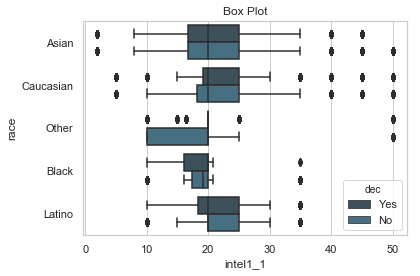

,F,p-value,H0
Asian,57.210332,4.017631e-14,Reject
Black,0.210596,6.463142e-01,Fail to Reject
Caucasian,5.761710,1.638139e-02,Reject
Latino,1.259068,2.618506e-01,Fail to Reject
Other,124.003208,1.346502e-28,Reject


,race,dec,mean,effect
intel1_1,Asian,No,20.348649,1.020655
intel1_1,Asian,Yes,19.936848,0.979763
intel1_1,Black,No,18.110033,1.012806
intel1_1,Black,Yes,17.881057,0.987356
intel1_1,Caucasian,No,21.428249,0.992724
intel1_1,Caucasian,Yes,21.585294,1.007329
intel1_1,Latino,No,22.761819,1.020666
intel1_1,Latino,Yes,22.300941,0.979752
intel1_1,Other,No,19.721198,0.895872
intel1_1,Other,Yes,22.013402,1.116230


In [33]:
x = 'race'
y = 'intel1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

#### 4.6.3.2 Subject Preference by Race: Intelligence: Males
With the exception of Blacks, and Latinos, the preference for intelligence was significantly associated with decision. 
Asian: 2% higher weights for no decision 
Black: 1% higher weights for the no decision
Cuacasian: 1% higher weights for the yes decision
Latino: 4% higher weights for the yes decision
Other: 7% higher weights for the yes decision
A higher mean weight for the yes decision means that a preference for intelligence had a positive association with a yes decision. In short Caucasians, Latinos and Others preferred intelligence in their mate.

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,1.769333e+05,4.0,1061.93,0,0.0570217,0.0569672
dec,1.399856e+03,1.0,33.6071,6.77346e-09,0.000451143,0.000437713
race:dec,3.579164e+03,4.0,21.4817,9.89018e-18,0.00115349,0.00109977
Residuals,2.921000e+06,70126.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
intel1_1,Asian,No,7803.0,0,0.0,10.00,16.874347,20.0,20.00,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Asian,Yes,7730.0,0,0.0,10.00,16.514220,18.0,20.00,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,No,1443.0,0,18.0,20.00,20.390852,20.0,20.00,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,Yes,1778.0,0,18.0,20.00,20.362205,20.0,20.00,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,No,23790.0,0,0.0,17.24,20.147000,20.0,23.81,42.86,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,Yes,19058.0,0,0.0,18.00,20.519821,20.0,25.00,42.86,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,No,2467.0,0,5.0,20.00,19.979550,20.0,23.26,35.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,Yes,1970.0,0,5.0,20.00,20.853401,20.0,25.00,35.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Other,No,1536.0,117,1.0,16.98,20.828333,20.0,25.00,30.00,0.256458,-3.347294,9.204377,0.0,Reject H0
intel1_1,Other,Yes,2561.0,63,1.0,19.44,22.330855,25.0,30.00,30.00,0.153077,-6.218954,36.675393,0.0,Reject H0


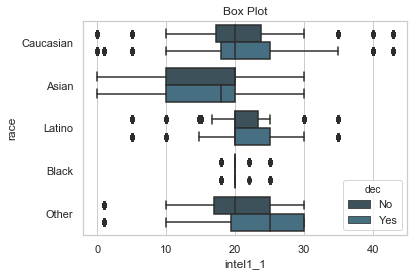

,F,p-value,H0
Asian,57.210332,4.017631e-14,Reject
Black,0.210596,6.463142e-01,Fail to Reject
Caucasian,5.761710,1.638139e-02,Reject
Latino,1.259068,2.618506e-01,Fail to Reject
Other,124.003208,1.346502e-28,Reject


,race,dec,mean,effect
intel1_1,Asian,No,16.874347,1.021807
intel1_1,Asian,Yes,16.514220,0.978658
intel1_1,Black,No,20.390852,1.001407
intel1_1,Black,Yes,20.362205,0.998595
intel1_1,Caucasian,No,20.147000,0.981831
intel1_1,Caucasian,Yes,20.519821,1.018505
intel1_1,Latino,No,19.979550,0.958096
intel1_1,Latino,Yes,20.853401,1.043737
intel1_1,Other,No,20.828333,0.932715
intel1_1,Other,Yes,22.330855,1.072138


In [46]:
x = 'race'
y = 'intel1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,7.525748e+04,4.0,425.129,0,0.0236694,0.0236134
dec,3.196936e+01,1.0,0.722378,0.395368,1.00548e-05,-3.86415e-06
race:dec,6.381636e+03,4.0,36.0498,3.82636e-30,0.0020071,0.0019514
Residuals,3.097855e+06,69999.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
intel1_1,Asian,No,9901.0,0,2.0,16.67,20.348649,20.00,25.0,50.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Asian,Yes,7602.0,0,2.0,16.67,19.936848,20.00,25.0,45.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,No,2093.0,0,10.0,17.39,18.110033,19.23,20.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,Yes,1911.0,0,10.0,16.00,17.881057,20.00,20.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,No,25555.0,247,5.0,18.18,21.428249,20.00,25.0,50.0,0.097372,-10.073292,99.471204,0.0,Reject H0
intel1_1,Caucasian,Yes,11612.0,57,5.0,19.23,21.585294,20.00,25.0,50.0,0.069720,-14.202965,199.724207,0.0,Reject H0
intel1_1,Latino,No,4662.0,0,10.0,20.00,22.761819,20.00,25.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,Yes,2550.0,0,10.0,18.37,22.300941,20.00,25.0,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Other,No,2571.0,390,10.0,10.00,19.721198,20.00,20.0,50.0,0.338178,-2.178072,2.744000,0.0,Reject H0
intel1_1,Other,Yes,1552.0,195,10.0,20.00,22.013402,20.00,20.0,50.0,0.314898,-2.466702,4.084619,0.0,Reject H0


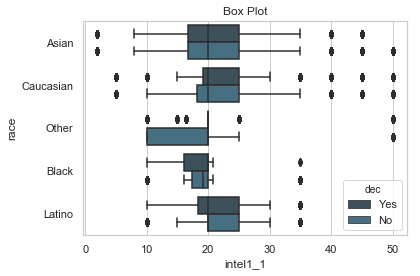

,F,p-value,H0
Asian,57.210332,4.017631e-14,Reject
Black,0.210596,6.463142e-01,Fail to Reject
Caucasian,5.761710,1.638139e-02,Reject
Latino,1.259068,2.618506e-01,Fail to Reject
Other,124.003208,1.346502e-28,Reject


,race,dec,mean,effect
intel1_1,Asian,No,20.348649,1.020655
intel1_1,Asian,Yes,19.936848,0.979763
intel1_1,Black,No,18.110033,1.012806
intel1_1,Black,Yes,17.881057,0.987356
intel1_1,Caucasian,No,21.428249,0.992724
intel1_1,Caucasian,Yes,21.585294,1.007329
intel1_1,Latino,No,22.761819,1.020666
intel1_1,Latino,Yes,22.300941,0.979752
intel1_1,Other,No,19.721198,0.895872
intel1_1,Other,Yes,22.013402,1.116230


In [33]:
x = 'race'
y = 'intel1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

#### 4.6.3.2 Subject Preference by Race: Intelligence: Males
With the exception of Blacks, and Latinos, the preference for intelligence was significantly associated with decision. 
Asian: 2% higher weights for no decision 
Black: 1% higher weights for the no decision
Cuacasian: 1% higher weights for the yes decision
Latino: 4% higher weights for the yes decision
Other: 7% higher weights for the yes decision
A higher mean weight for the yes decision means that a preference for intelligence had a positive association with a yes decision. In short Caucasians, Latinos and Others preferred intelligence in their mate.

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,1.769333e+05,4.0,1061.93,0,0.0570217,0.0569672
dec,1.399856e+03,1.0,33.6071,6.77346e-09,0.000451143,0.000437713
race:dec,3.579164e+03,4.0,21.4817,9.89018e-18,0.00115349,0.00109977
Residuals,2.921000e+06,70126.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
intel1_1,Asian,No,7803.0,0,0.0,10.00,16.874347,20.0,20.00,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Asian,Yes,7730.0,0,0.0,10.00,16.514220,18.0,20.00,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,No,1443.0,0,18.0,20.00,20.390852,20.0,20.00,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Black,Yes,1778.0,0,18.0,20.00,20.362205,20.0,20.00,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,No,23790.0,0,0.0,17.24,20.147000,20.0,23.81,42.86,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Caucasian,Yes,19058.0,0,0.0,18.00,20.519821,20.0,25.00,42.86,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,No,2467.0,0,5.0,20.00,19.979550,20.0,23.26,35.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Latino,Yes,1970.0,0,5.0,20.00,20.853401,20.0,25.00,35.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
intel1_1,Other,No,1536.0,117,1.0,16.98,20.828333,20.0,25.00,30.00,0.256458,-3.347294,9.204377,0.0,Reject H0
intel1_1,Other,Yes,2561.0,63,1.0,19.44,22.330855,25.0,30.00,30.00,0.153077,-6.218954,36.675393,0.0,Reject H0


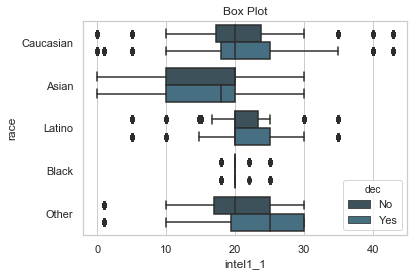

,F,p-value,H0
Asian,57.210332,4.017631e-14,Reject
Black,0.210596,6.463142e-01,Fail to Reject
Caucasian,5.761710,1.638139e-02,Reject
Latino,1.259068,2.618506e-01,Fail to Reject
Other,124.003208,1.346502e-28,Reject


,race,dec,mean,effect
intel1_1,Asian,No,16.874347,1.021807
intel1_1,Asian,Yes,16.514220,0.978658
intel1_1,Black,No,20.390852,1.001407
intel1_1,Black,Yes,20.362205,0.998595
intel1_1,Caucasian,No,20.147000,0.981831
intel1_1,Caucasian,Yes,20.519821,1.018505
intel1_1,Latino,No,19.979550,0.958096
intel1_1,Latino,Yes,20.853401,1.043737
intel1_1,Other,No,20.828333,0.932715
intel1_1,Other,Yes,22.330855,1.072138


In [46]:
x = 'race'
y = 'intel1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

### 4.6.4 Subject Preference: Funny
#### 4.6.4.1 Subject Preference: Funny - Affect on Decision by Race (Females) 
Overall the effect if the preference for a sense of humor by gender and race was significant 
Asian: 3% higher mean for yes decisions
Blacks: 6% higher mean for yes decisions
Caucasian: 3% higher mean for yes decisions (Not significant)
Latino: 1% higher mean for yes decisions (Not significant)
Other: 15% higher mean for yes decisions
Key takeway: yes decisions were associated with higher preference for a sense of humor.  Minimal practical significance

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,7.623310e+04,4.0,668.565,0,0.036641,0.0365857
dec,5.992741e+03,1.0,210.226,1.43776e-47,0.00288038,0.00286664
race:dec,2.908330e+03,4.0,25.5061,3.77835e-21,0.00139787,0.00134305
Residuals,1.995407e+06,69999.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
fun1_1,Asian,No,9901.0,0,0.0,14.0,16.110616,16.67,20.00,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Asian,Yes,7602.0,0,2.0,14.0,16.588592,15.69,20.00,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Black,No,2093.0,0,10.0,10.0,16.460535,17.39,19.23,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Black,Yes,1911.0,0,10.0,15.0,17.436473,18.75,20.00,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Caucasian,No,25555.0,247,5.0,15.0,17.722021,18.18,20.00,40.0,0.097372,-10.073292,99.471204,0.0,Reject H0
fun1_1,Caucasian,Yes,11612.0,57,5.0,15.0,18.252708,19.23,20.00,40.0,0.069720,-14.202965,199.724207,0.0,Reject H0
fun1_1,Latino,No,4662.0,0,5.0,10.0,15.104505,16.33,20.00,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Latino,Yes,2550.0,0,5.0,10.0,15.332863,16.33,20.00,35.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Other,No,2571.0,390,5.0,10.0,14.450253,15.00,20.00,25.0,0.338178,-2.178072,2.744000,0.0,Reject H0
fun1_1,Other,Yes,1552.0,195,10.0,10.0,16.638144,15.00,20.00,30.0,0.314898,-2.466702,4.084619,0.0,Reject H0


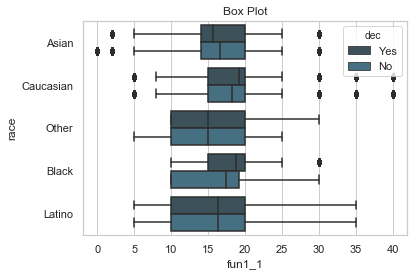

,F,p-value,H0
Asian,101.598445,7.364199e-24,Reject
Black,53.897590,2.343039e-13,Reject
Caucasian,1.062331,3.026873e-01,Fail to Reject
Latino,1.781764,1.819589e-01,Fail to Reject
Other,145.288806,3.533893e-33,Reject


,race,dec,mean,effect
fun1_1,Asian,No,16.110616,0.971186
fun1_1,Asian,Yes,16.588592,1.029668
fun1_1,Black,No,16.460535,0.944029
fun1_1,Black,Yes,17.436473,1.059290
fun1_1,Caucasian,No,17.722021,0.970926
fun1_1,Caucasian,Yes,18.252708,1.029945
fun1_1,Latino,No,15.104505,0.985107
fun1_1,Latino,Yes,15.332863,1.015119
fun1_1,Other,No,14.450253,0.868501
fun1_1,Other,Yes,16.638144,1.151409


In [47]:
x = 'race'
y = 'fun1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

#### 4.6.4.2 Subject Preference by Race: Funny: Males
With the exception of Blacks, and Latinos, the preference for a sense of humor was significantly associated with decision. 
Asian: 11% higher weights for no decision 
Black: 2% higher weights for the yes decision
Cuacasian: 3% higher weights for the no decision (Not significant)
Latino: 2% higher weights for the no decision (Not significant)
Other: 1% higher weights for the yes decision
Key takeaway: If there was a positive association between a preference for a sense of humor and decision, it was slight.  For Asian males, there was a strong inverse association between decision and a sense of humor.  

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,3.149226e+04,4.0,189.619,5.75577e-162,0.0106508,0.0105945
dec,1.050445e+04,1.0,252.994,7.26832e-57,0.00355265,0.00353856
race:dec,7.278745e+03,4.0,43.8262,8.45654e-37,0.00246171,0.0024055
Residuals,2.907512e+06,70026.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
fun1_1,Asian,No,7723.0,80,5.0,15.00,17.786971,20.00,20.00,30.00,0.100734,-9.723572,92.547859,0.0,Reject H0
fun1_1,Asian,Yes,7710.0,20,5.0,10.00,15.888176,17.00,20.00,30.00,0.050800,-19.583222,381.502594,0.0,Reject H0
fun1_1,Black,No,1443.0,0,10.0,15.00,16.883576,17.00,20.00,20.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Black,Yes,1778.0,0,10.0,15.00,17.338020,18.00,20.00,20.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Caucasian,No,23790.0,0,0.0,15.00,18.532847,20.00,20.00,50.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Caucasian,Yes,19058.0,0,0.0,15.00,17.953038,19.05,21.05,50.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Latino,No,2467.0,0,10.0,14.71,17.010357,18.00,20.00,23.26,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Latino,Yes,1970.0,0,10.0,14.71,16.640203,15.00,20.00,23.26,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
fun1_1,Other,No,1536.0,117,5.0,15.00,18.617734,19.00,20.00,40.00,0.256458,-3.347294,9.204377,0.0,Reject H0
fun1_1,Other,Yes,2561.0,63,5.0,15.00,18.646169,20.00,25.00,40.00,0.153077,-6.218954,36.675393,0.0,Reject H0


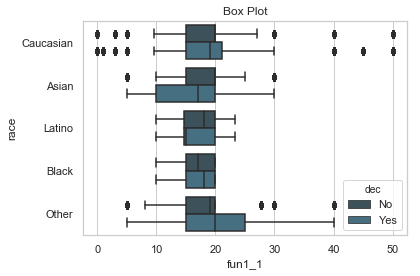

,F,p-value,H0
Asian,101.598445,7.364199e-24,Reject
Black,53.897590,2.343039e-13,Reject
Caucasian,1.062331,3.026873e-01,Fail to Reject
Latino,1.781764,1.819589e-01,Fail to Reject
Other,145.288806,3.533893e-33,Reject


,race,dec,mean,effect
fun1_1,Asian,No,17.786971,1.119510
fun1_1,Asian,Yes,15.888176,0.893248
fun1_1,Black,No,16.883576,0.973789
fun1_1,Black,Yes,17.338020,1.026916
fun1_1,Caucasian,No,18.532847,1.032296
fun1_1,Caucasian,Yes,17.953038,0.968715
fun1_1,Latino,No,17.010357,1.022245
fun1_1,Latino,Yes,16.640203,0.978240
fun1_1,Other,No,18.617734,0.998475
fun1_1,Other,Yes,18.646169,1.001527


In [49]:
x = 'race'
y = 'fun1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

### 4.6.5 Subject Preference: Ambition
#### 4.6.5.1 Subject Preference: Ambition - Affect on Decision by Race (Females) 
Overall the effect if the preference for a ambition by gender and race was significant 
Asian: 7% higher mean for no decisions
Blacks: 12% higher mean for yes decisions
Caucasian: 3% higher mean for yes decisions 
Latino: 8% higher mean for yes decisions 
Other: 13% higher mean for no decisions
Key takeway: Significant relationship between ambition and decision for the females, but there are cultural differences in the direction of the association between a preference for ambition and decision. 

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,8.505896e+04,4.0,722.992,0,0.0394656,0.0394105
dec,9.646170e+01,1.0,3.27966,0.0701479,4.47562e-05,3.11092e-05
race:dec,1.129194e+04,4.0,95.9802,1.39161e-81,0.00523923,0.00518457
Residuals,2.058821e+06,69999.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
amb1_1,Asian,No,9901.0,0,0.0,10.0,12.717255,14.00,16.00,20.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Asian,Yes,7602.0,0,0.0,10.0,11.804154,10.00,15.00,20.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Black,No,2093.0,0,5.0,10.0,15.496464,15.22,19.23,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Black,Yes,1911.0,0,5.0,15.0,17.485034,16.67,20.00,30.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Caucasian,No,25555.0,247,0.0,10.0,12.705294,15.00,16.98,20.00,0.097372,-10.073292,99.471204,0.0,Reject H0
amb1_1,Caucasian,Yes,11612.0,57,0.0,10.0,13.047457,15.00,16.67,20.00,0.069720,-14.202965,199.724207,0.0,Reject H0
amb1_1,Latino,No,4662.0,0,0.0,10.0,12.810618,11.00,17.24,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Latino,Yes,2550.0,0,0.0,10.0,13.779961,15.00,18.37,25.00,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Other,No,2571.0,390,2.0,10.0,10.682769,10.00,15.00,20.41,0.338178,-2.178072,2.744000,0.0,Reject H0
amb1_1,Other,Yes,1552.0,195,2.0,10.0,9.493299,10.00,10.00,20.41,0.314898,-2.466702,4.084619,0.0,Reject H0


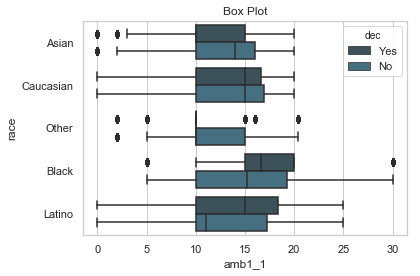

,F,p-value,H0
Asian,42.527868,7.068986e-11,Reject
Black,37.472516,9.756035e-10,Reject
Caucasian,55.048534,1.187501e-13,Reject
Latino,18.908567,1.383008e-05,Reject
Other,262.587111,3.710526e-58,Reject


,race,dec,mean,effect
amb1_1,Asian,No,12.717255,1.077354
amb1_1,Asian,Yes,11.804154,0.928200
amb1_1,Black,No,15.496464,0.886270
amb1_1,Black,Yes,17.485034,1.128324
amb1_1,Caucasian,No,12.705294,0.973776
amb1_1,Caucasian,Yes,13.047457,1.026931
amb1_1,Latino,No,12.810618,0.929656
amb1_1,Latino,Yes,13.779961,1.075667
amb1_1,Other,No,10.682769,1.125296
amb1_1,Other,Yes,9.493299,0.888655


In [3]:
x = 'race'
y = 'amb1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

#### 4.6.5.2 Subject Preference by Race: Ambition: Males
With the exception of Blacks, and Latinos, the preference for a sense of humor was significantly associated with decision. 
Asian: 6% higher weights for yes decision 
Black: 18% higher weights for the yes decision
Cuacasian: 5% higher weights for the yes decision 
Latino: 11% higher weights for the yes decision 
Other: 17% higher weights for the no decision
Key takeaway: A preference for ambition was positively associated with decision for all males except Others, where the association was reversed. Ambition could be a significant predictor of decision

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,3.661441e+04,4.0,281.817,8.197e-241,0.0158181,0.0157618
dec,2.871690e+03,1.0,88.4124,5.46765e-21,0.00124063,0.00122658
race:dec,3.984252e+03,4.0,30.6664,1.5165e-25,0.00172127,0.00166512
Residuals,2.271241e+06,69926.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
amb1_1,Asian,No,7723.0,80,0.0,5.00,9.238143,10.00,13.04,20.0,0.100734,-9.723572,92.547859,0.0,Reject H0
amb1_1,Asian,Yes,7710.0,20,0.0,5.00,9.836503,10.00,14.00,20.0,0.050800,-19.583222,381.502594,0.0,Reject H0
amb1_1,Black,No,1443.0,0,0.0,0.00,6.851698,10.00,10.00,15.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Black,Yes,1778.0,0,0.0,0.00,8.145107,10.00,10.00,15.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Caucasian,No,23770.0,20,0.0,4.00,7.760312,10.00,10.53,20.0,0.028982,-34.445622,1184.500841,0.0,Reject H0
amb1_1,Caucasian,Yes,18978.0,80,0.0,5.00,8.128557,9.52,12.50,20.0,0.064654,-15.337184,233.229215,0.0,Reject H0
amb1_1,Latino,No,2467.0,0,0.0,5.00,8.990940,10.00,10.00,53.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Latino,Yes,1970.0,0,0.0,6.00,9.973401,10.00,10.00,53.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
amb1_1,Other,No,1536.0,117,1.0,5.00,8.868385,10.00,14.81,20.0,0.256458,-3.347294,9.204377,0.0,Reject H0
amb1_1,Other,Yes,2561.0,63,1.0,2.78,7.555970,5.00,10.00,20.0,0.153077,-6.218954,36.675393,0.0,Reject H0


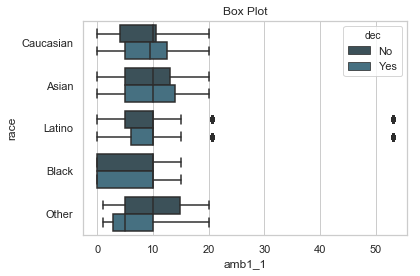

,F,p-value,H0
Asian,42.527868,7.068986e-11,Reject
Black,37.472516,9.756035e-10,Reject
Caucasian,55.048534,1.187501e-13,Reject
Latino,18.908567,1.383008e-05,Reject
Other,262.587111,3.710526e-58,Reject


,race,dec,mean,effect
amb1_1,Asian,No,9.238143,0.939169
amb1_1,Asian,Yes,9.836503,1.064771
amb1_1,Black,No,6.851698,0.841204
amb1_1,Black,Yes,8.145107,1.188772
amb1_1,Caucasian,No,7.760312,0.954697
amb1_1,Caucasian,Yes,8.128557,1.047452
amb1_1,Latino,No,8.990940,0.901492
amb1_1,Latino,Yes,9.973401,1.109272
amb1_1,Other,No,8.868385,1.173692
amb1_1,Other,Yes,7.555970,0.852012


In [4]:
x = 'race'
y = 'amb1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

### 4.6.6 Subject Preference: Shared Interests
#### 4.6.6.1 Subject Preference: Shared Interests - Affect on Decision by Race (Females) 
Overall the effect if the preference for a shared interests by gender and race was significant 
Asian: 17% higher mean for yes decisions
Blacks: 3% higher mean for no decisions (Not significant)
Caucasian: 3% higher mean for no decisions 
Latino: 10% higher mean for yes decisions 
Other: 27% higher mean for no decisions
Key takeway: Strong association between a preference for shared interests and decision for Asians and Others; however, the direction of the association was reversed.  For Asians a preference for shared interests was associated with a yes decision. Opposite for Others.

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,1.003844e+05,4.0,803.004,0,0.0435154,0.0434606
dec,8.373998e+03,1.0,267.944,4.12677e-60,0.00363003,0.00361643
race:dec,2.557625e+04,4.0,204.592,8.69882e-175,0.011087,0.0110327
Residuals,2.172535e+06,69515.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
shar1_1,Asian,No,9901.0,0,0.0,10.0,13.602545,15.0,18.00,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Asian,Yes,7602.0,0,0.0,10.0,15.969821,15.0,20.00,30.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Black,No,2093.0,0,0.0,10.0,12.434305,15.0,16.00,20.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Black,Yes,1911.0,0,0.0,10.0,12.075877,12.5,16.00,20.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Caucasian,No,25555.0,247,0.0,10.0,12.293178,12.0,15.09,30.0,0.097372,-10.073292,99.471204,0.0,Reject H0
shar1_1,Caucasian,Yes,11612.0,57,0.0,10.0,11.967764,10.0,16.00,30.0,0.069720,-14.202965,199.724207,0.0,Reject H0
shar1_1,Latino,No,4200.0,462,0.0,5.0,10.220833,10.0,15.00,20.0,0.298795,-2.683451,5.200909,0.0,Reject H0
shar1_1,Latino,Yes,2528.0,22,0.0,5.0,11.275119,10.0,15.00,30.0,0.092483,-10.626278,110.917793,0.0,Reject H0
shar1_1,Other,No,2571.0,390,5.0,10.0,11.954959,10.0,15.00,20.0,0.338178,-2.178072,2.744000,0.0,Reject H0
shar1_1,Other,Yes,1552.0,195,10.0,10.0,14.668041,14.0,20.00,20.0,0.314898,-2.466702,4.084619,0.0,Reject H0


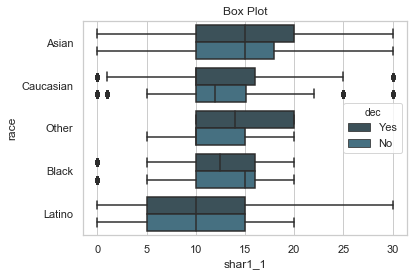

,F,p-value,H0
Asian,730.981350,3.016309e-159,Reject
Black,0.550837,4.579999e-01,Fail to Reject
Caucasian,7.275490,6.991650e-03,Reject
Latino,57.991095,2.845608e-14,Reject
Other,14.347368,1.530762e-04,Reject


,race,dec,mean,effect
shar1_1,Asian,No,13.602545,0.851766
shar1_1,Asian,Yes,15.969821,1.174032
shar1_1,Black,No,12.434305,1.029681
shar1_1,Black,Yes,12.075877,0.971174
shar1_1,Caucasian,No,12.293178,1.027191
shar1_1,Caucasian,Yes,11.967764,0.973529
shar1_1,Latino,No,10.220833,0.906495
shar1_1,Latino,Yes,11.275119,1.103151
shar1_1,Other,No,11.954959,0.815034
shar1_1,Other,Yes,14.668041,1.226942


In [5]:
x = 'race'
y = 'shar1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_females, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect

#### 4.6.6.2 Subject Preference by Race: Shared Interests: Males
With the exception of Blacks, and Latinos, the preference for a sense of humor was significantly associated with decision. 
Asian: 6% higher weights for yes decision 
Black: 18% higher weights for the yes decision
Cuacasian: 5% higher weights for the yes decision 
Latino: 11% higher weights for the yes decision 
Other: 17% higher weights for the no decision
Key takeaway: A preference for ambition was positively associated with decision for all males except Others, where the association was reversed. Ambition could be a significant predictor of decision

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
race,1.279126e+05,4.0,732.98,0,0.039998,0.0399429
dec,1.302731e+04,1.0,298.603,9.14491e-67,0.00407361,0.00405992
race:dec,6.331685e+03,4.0,36.2826,2.41989e-30,0.00197991,0.00192531
Residuals,3.050702e+06,69926.0,,,,


,race,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
shar1_1,Asian,No,7723.0,80,0.0,10.0,12.353214,10.00,18.00,30.0,0.100734,-9.723572,92.547859,0.0,Reject H0
shar1_1,Asian,Yes,7710.0,20,0.0,10.0,13.765987,13.33,18.00,30.0,0.050800,-19.583222,381.502594,0.0,Reject H0
shar1_1,Black,No,1443.0,0,0.0,5.0,8.401247,10.00,15.00,16.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Black,Yes,1778.0,0,0.0,5.0,9.607987,10.00,15.00,16.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Caucasian,No,23770.0,20,0.0,5.0,10.085395,10.00,15.00,30.0,0.028982,-34.445622,1184.500841,0.0,Reject H0
shar1_1,Caucasian,Yes,18978.0,80,0.0,5.0,10.978840,10.00,15.56,30.0,0.064654,-15.337184,233.229215,0.0,Reject H0
shar1_1,Latino,No,2467.0,0,0.0,10.0,12.506749,10.00,20.00,22.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Latino,Yes,1970.0,0,0.0,7.0,12.954619,15.00,20.00,22.0,0.000000,0.000000,-3.000000,1.0,Fail to Reject H0
shar1_1,Other,No,1536.0,117,0.0,5.0,9.413307,10.00,15.00,21.0,0.256458,-3.347294,9.204377,0.0,Reject H0
shar1_1,Other,Yes,2561.0,63,0.0,3.0,8.023366,5.00,10.00,21.0,0.153077,-6.218954,36.675393,0.0,Reject H0


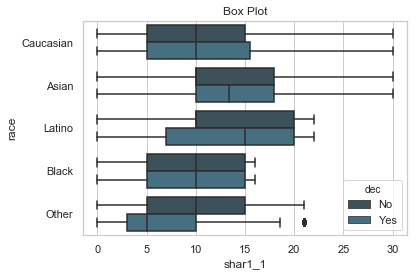

,F,p-value,H0
Asian,730.981350,3.016309e-159,Reject
Black,0.550837,4.579999e-01,Fail to Reject
Caucasian,7.275490,6.991650e-03,Reject
Latino,57.991095,2.845608e-14,Reject
Other,14.347368,1.530762e-04,Reject


,race,dec,mean,effect
shar1_1,Asian,No,12.353214,0.897372
shar1_1,Asian,Yes,13.765987,1.114365
shar1_1,Black,No,8.401247,0.874402
shar1_1,Black,Yes,9.607987,1.143638
shar1_1,Caucasian,No,10.085395,0.918621
shar1_1,Caucasian,Yes,10.978840,1.088588
shar1_1,Latino,No,12.506749,0.965428
shar1_1,Latino,Yes,12.954619,1.035810
shar1_1,Other,No,9.413307,1.173237
shar1_1,Other,Yes,8.023366,0.852343


In [6]:
x = 'race'
y = 'shar1_1'
z = 'dec'

i, d, p = trivariate.analysis(df_males, x=x,y=y,z=z)
i
d
p
aov = independence.grouped_anova(df, x,y,z)
aov
effect = trivariate.effect(d, 'race', 'dec')
effect